In [1]:
import os
import zipfile
import pandas as pd
import string
import nltk
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from nltk.corpus import stopwords #libraray untuk menmapilkan kosakata umum
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
#membuat folder untuk ham and spam
try:
  if not os.path.exists(os.path.dirname('spam and ham')):
    os.makedirs('spam and ham')
except OSError as err:
  print(err)


[WinError 183] Cannot create a file when that file already exists: 'spam and ham'


In [5]:
#membuat folder untuk stopwords
try:
  if not os.path.exists(os.path.dirname('customewords')):
    os.makedirs('customewords')
except OSError as err:
  print(err)


[WinError 183] Cannot create a file when that file already exists: 'customewords'


In [6]:
#ekstrak zip file ham and spam
ekstrak_file=zipfile.ZipFile('spam and ham.zip','r')
ekstrak_file.extractall("spam and ham")
ekstrak_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'custome.zip'

In [8]:
df = pd.read_csv('spam and ham/spam.csv', encoding= 'ISO-8859-1', low_memory=False)


In [9]:
df.drop(df.iloc[:,2:6],axis=1,inplace=True) #menghapus  nilai NAN dari kolom 2 sampai 5 
df.rename({'v1':'label','v2':'text'},axis=1,inplace=True) #mengubah nama kolum

In [10]:
#mengubah label menjadi one hot encoding
kategori=pd.get_dummies(df.label)
kategori

ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]

In [11]:
#menyambungkan hasil one hote encoding ke tabel df
new_df=pd.concat([df,kategori],axis=1)
new_df


label                                               text  ham  spam
0      ham  Go until jurong point, crazy.. Available only ...    1     0
1      ham                      Ok lar... Joking wif u oni...    1     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...    0     1
3      ham  U dun say so early hor... U c already then say...    1     0
4      ham  Nah I don't think he goes to usf, he lives aro...    1     0
...    ...                                                ...  ...   ...
5567  spam  This is the 2nd time we have tried 2 contact u...    0     1
5568   ham              Will Ì_ b going to esplanade fr home?    1     0
5569   ham  Pity, * was in mood for that. So...any other s...    1     0
5570   ham  The guy did some bitching but I acted like i'd...    1     0
5571   ham                         Rofl. Its true to its name    1     0

[5572 rows x 4 columns]

In [12]:
#menghapus label karena sudah tidak dibutuhkan
new_df.drop(columns="label",inplace=True)
new_df

text  ham  spam
0     Go until jurong point, crazy.. Available only ...    1     0
1                         Ok lar... Joking wif u oni...    1     0
2     Free entry in 2 a wkly comp to win FA Cup fina...    0     1
3     U dun say so early hor... U c already then say...    1     0
4     Nah I don't think he goes to usf, he lives aro...    1     0
...                                                 ...  ...   ...
5567  This is the 2nd time we have tried 2 contact u...    0     1
5568              Will Ì_ b going to esplanade fr home?    1     0
5569  Pity, * was in mood for that. So...any other s...    1     0
5570  The guy did some bitching but I acted like i'd...    1     0
5571                         Rofl. Its true to its name    1     0

[5572 rows x 3 columns]

In [13]:
string.punctuation #menmapilkan operasi regex

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def text_proses(teks):
  hapus_punc=[char for char in teks if char not in string.punctuation] #menghapus text yang berisi string punctation
  hapus_punc=''.join(hapus_punc)
  word_list=[word for word in hapus_punc.split() if word not in stopwords.words('english')] #menghapus text yang berisi kata kata yang terdapat dalam stopwords
  return ' '.join(word_list)
  
    


In [16]:
new_df.tail()

text  ham  spam
5567  This is the 2nd time we have tried 2 contact u...    0     1
5568              Will Ì_ b going to esplanade fr home?    1     0
5569  Pity, * was in mood for that. So...any other s...    1     0
5570  The guy did some bitching but I acted like i'd...    1     0
5571                         Rofl. Its true to its name    1     0

In [17]:
new_df['teks']=new_df['text'].apply(text_proses) #menggabungkan hasil text yang sudah diproses pada dataframe new_df

In [18]:
new_df

text  ham  spam  \
0     Go until jurong point, crazy.. Available only ...    1     0   
1                         Ok lar... Joking wif u oni...    1     0   
2     Free entry in 2 a wkly comp to win FA Cup fina...    0     1   
3     U dun say so early hor... U c already then say...    1     0   
4     Nah I don't think he goes to usf, he lives aro...    1     0   
...                                                 ...  ...   ...   
5567  This is the 2nd time we have tried 2 contact u...    0     1   
5568              Will Ì_ b going to esplanade fr home?    1     0   
5569  Pity, * was in mood for that. So...any other s...    1     0   
5570  The guy did some bitching but I acted like i'd...    1     0   
5571                         Rofl. Its true to its name    1     0   

                                                   teks  
0     Go jurong point crazy Available bugis n great ...  
1                               Ok lar Joking wif u oni  
2     Free entry 2 wkly comp win FA Cup final tkts 2...  
3                   U dun say early hor U c already say  
4         Nah I dont think goes usf lives around though  
...                                                 ...  
5567  This 2nd time tried 2 contact u U å£750 Pound ...  
5568                   Will Ì b going esplanade fr home  
5569                        Pity mood Soany suggestions  
5570  The guy bitching I acted like id interested bu...  
5571                                 Rofl Its true name  

[5572 rows x 4 columns]

In [19]:
#menhapus label text karena sudah tidak diperlukan
new_df.drop(columns='text',inplace=True)


In [20]:
new_df

ham  spam                                               teks
0       1     0  Go jurong point crazy Available bugis n great ...
1       1     0                            Ok lar Joking wif u oni
2       0     1  Free entry 2 wkly comp win FA Cup final tkts 2...
3       1     0                U dun say early hor U c already say
4       1     0      Nah I dont think goes usf lives around though
...   ...   ...                                                ...
5567    0     1  This 2nd time tried 2 contact u U å£750 Pound ...
5568    1     0                   Will Ì b going esplanade fr home
5569    1     0                        Pity mood Soany suggestions
5570    1     0  The guy bitching I acted like id interested bu...
5571    1     0                                 Rofl Its true name

[5572 rows x 3 columns]

In [21]:
#mengubah isi data kedalam bentuk numpy arry supaya bisa diproses
x=new_df['teks'].values
y=new_df[['ham','spam']].values

In [22]:
#membagi data testing dan training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
#membuat objek tokeniser serta melakukan tokenisasi
tokenisasi=Tokenizer(num_words=1000,oov_token='x')
tokenisasi.fit_on_texts(x_train)
tokenisasi.fit_on_texts(x_test)

#membuat sequence
sequence_latih=tokenisasi.texts_to_sequences(x_train)
sequence_test=tokenisasi.texts_to_sequences(x_test)

#melakukan padding
padding_latih=pad_sequences(sequence_latih)
padding_test=pad_sequences(sequence_test)

In [24]:
#membuat model sequential
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000,output_dim=33),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.Flatten(), #PENGGANTI FUMGSI FLATTEN
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data

    tf.keras.layers.Dense(2, activation='sigmoid') #untuk binary class
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [25]:
#callbacks
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.98):
            print('Akurasi mencapai 99%')
            self.model.stop_training=True
stopTraining=Callback()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 33)          33000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                25088     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [27]:

history = model.fit(padding_latih, y_train, epochs=50,callbacks=stopTraining, 
                    validation_data=(padding_test, y_test))

Epoch 1/50
140/140 [==============================] - 13s 29ms/step - loss: 0.2284 - accuracy: 0.9138 - val_loss: 0.0531 - val_accuracy: 0.9830
Epoch 2/50
140/140 [==============================] - 3s 23ms/step - loss: 0.0581 - accuracy: 0.9841 - val_loss: 0.0489 - val_accuracy: 0.9865
Epoch 3/50
140/140 [==============================] - 3s 21ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0510 - val_accuracy: 0.9812
Epoch 4/50
140/140 [==============================] - 3s 20ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.0411 - val_accuracy: 0.9883
Akurasi mencapai 99%


In [28]:
model.evaluate(padding_test, y_test)

35/35 [==============================] - 0s 8ms/step - loss: 0.0411 - accuracy: 0.9883


[0.04105643555521965, 0.9883407950401306]

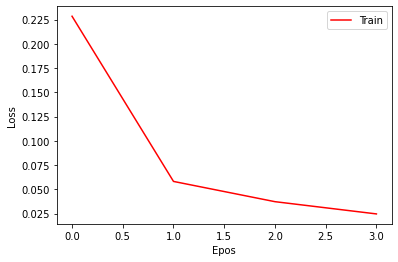

In [29]:
#plot loss
plt.plot(history.history['loss'],'r')
plt.ylabel('Loss')
plt.xlabel('Epos')
plt.legend(['Train'], loc='upper right')
plt.show()

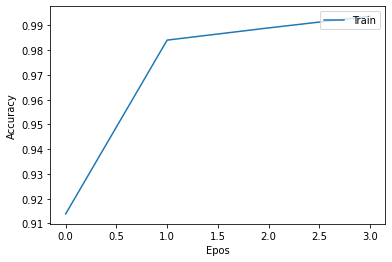

In [30]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epos')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper right')
plt.show()